In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Data Assignment - Raj.csv")

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Day                       61 non-null     object 
 1   Date                      61 non-null     object 
 2   Leads                     41 non-null     float64
 3   Time spent on LG (mins)   41 non-null     float64
 4   Avg Time Per Lead (mins)  41 non-null     float64
 5   Daily Team Review         41 non-null     object 
 6   No. of Incomplete Leads   41 non-null     float64
dtypes: float64(4), object(3)
memory usage: 3.5+ KB


In [348]:
print(df.isnull().sum())

Day                          0
Date                         0
Leads                       20
Time spent on LG (mins)     20
Avg Time Per Lead (mins)    20
Daily Team Review           20
No. of Incomplete Leads     20
dtype: int64


In [349]:
df.describe()

,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),No. of Incomplete Leads
count,41.000000,41.000000,41.000000,41.000000
mean,10.902439,258.170732,24.146341,0.341463
std,2.653346,54.391591,5.227624,1.086503
min,4.000000,45.000000,11.000000,0.000000
25%,10.000000,240.000000,21.000000,0.000000
50%,10.000000,260.000000,24.000000,0.000000
75%,12.000000,280.000000,26.000000,0.000000
max,19.000000,370.000000,37.000000,6.000000


In [350]:
df.isnull()

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
56,False,False,False,False,False,False,False
57,False,False,False,False,False,False,False
58,False,False,False,False,False,False,False
59,False,False,False,False,False,False,False


In [351]:
!pip install missingno


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

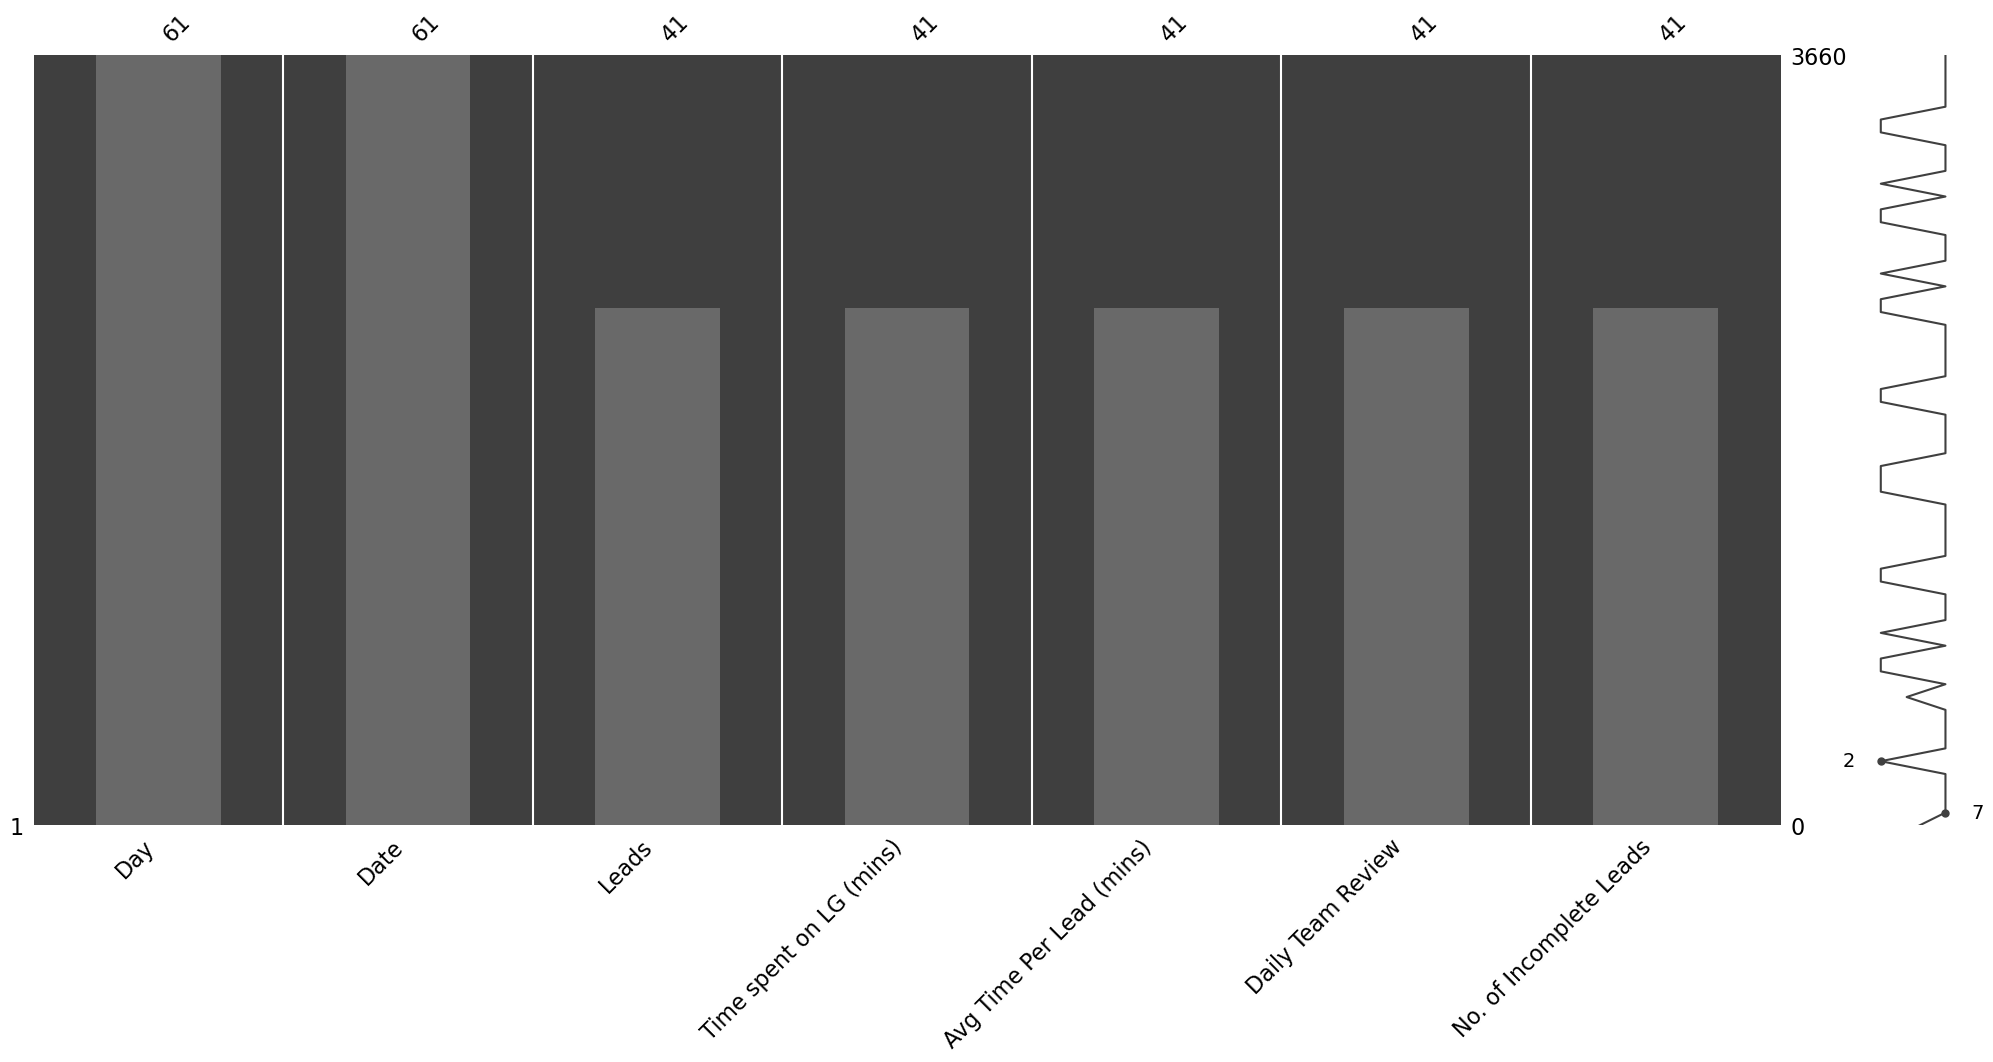

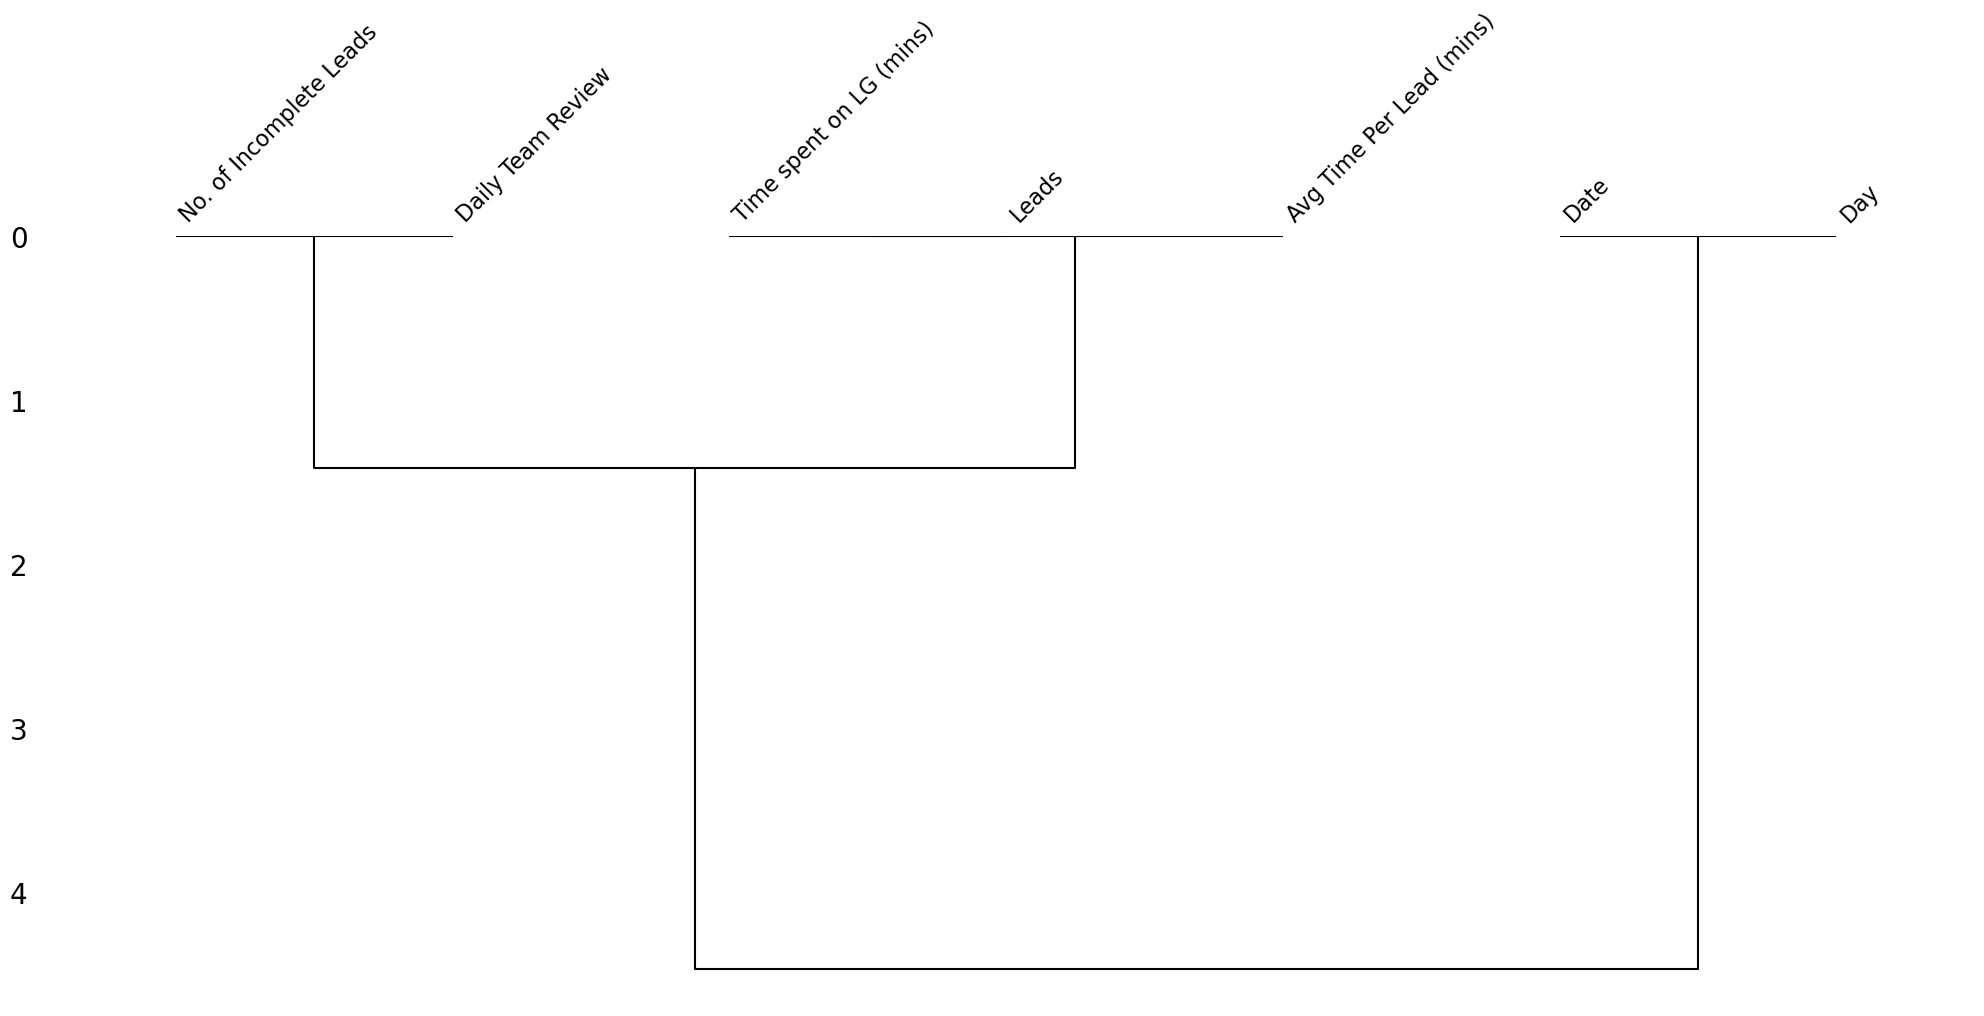

In [352]:
import missingno as msno

# Matrix visualization
msno.matrix(df)

# Bar chart showing the count of non-null values per column
msno.bar(df)

# Dendrogram to check missing value correlations
msno.dendrogram(df)


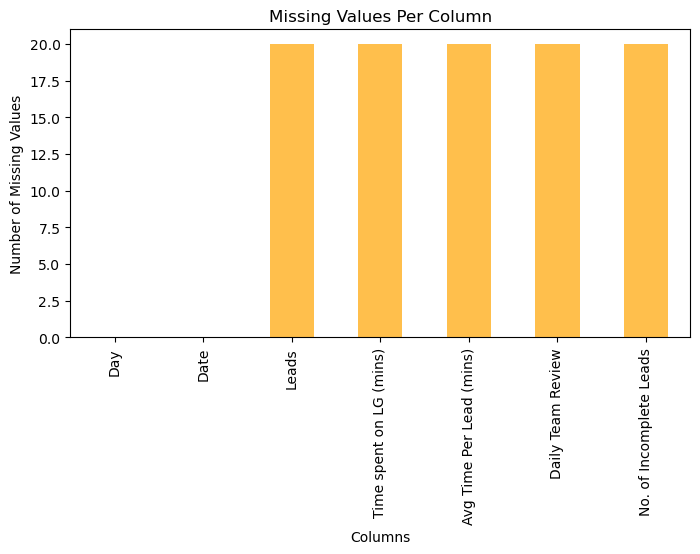

In [353]:
df.isnull().sum().plot(kind='bar', figsize=(8, 4), color='orange', alpha=0.7)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values Per Column")
plt.show()

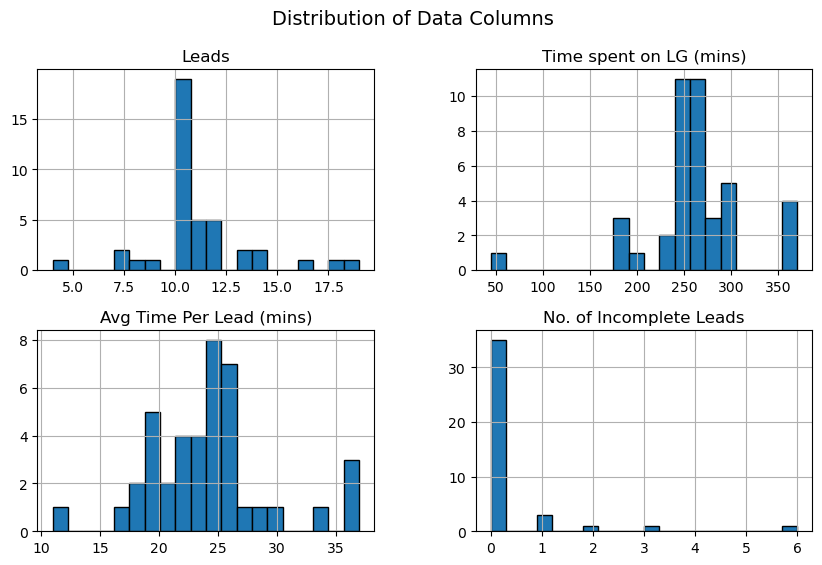

In [354]:
df.hist(figsize=(10,6), bins=20, edgecolor='black')
plt.suptitle("Distribution of Data Columns", fontsize=14)
plt.show()


In [355]:
import pandas as pd
# Convert 'Daily Team Review' to numerical values
df['Daily Team Review'] = df['Daily Team Review'].map({'Attended': 1, 'Missed': 0})
# Display the updated DataFrame
print(df.head(10))  # Show first 5 rows

   Day        Date  Leads  Time spent on LG (mins)  Avg Time Per Lead (mins)  \
0  Mon  12-06-2023    7.0                    240.0                      34.0   
1  Tue  13-06-2023   10.0                    360.0                      36.0   
2  Wed  14-06-2023   10.0                    270.0                      27.0   
3  Thu  15-06-2023   10.0                    260.0                      26.0   
4  Fri  16-06-2023   10.0                    240.0                      24.0   
5  Sat  17-06-2023    NaN                      NaN                       NaN   
6  Sun  18-06-2023    NaN                      NaN                       NaN   
7  Mon  19-06-2023   10.0                    360.0                      36.0   
8  Tue  20-06-2023   10.0                    260.0                      26.0   
9  Wed  21-06-2023    8.0                    240.0                      30.0   

   Daily Team Review  No. of Incomplete Leads  
0                1.0                      0.0  
1                1.0   

Daily Team Review Count:
 Daily Team Review
1.0    39
0.0     2
Name: count, dtype: int64


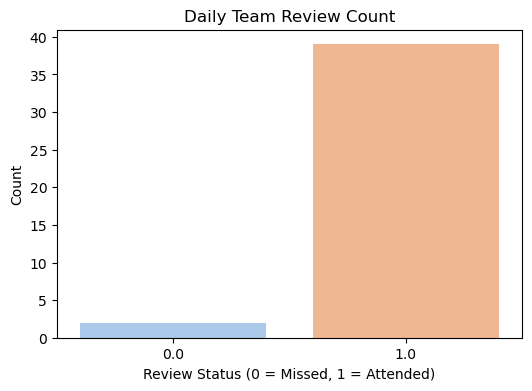

In [356]:
review_counts = df['Daily Team Review'].value_counts()
print("Daily Team Review Count:\n", review_counts)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x=df['Daily Team Review'], palette="pastel")
plt.title("Daily Team Review Count")
plt.xlabel("Review Status (0 = Missed, 1 = Attended)")
plt.ylabel("Count")
plt.show()


In [357]:
from scipy.stats import skew


In [358]:
def check_skewness(df):
    num_cols = df.select_dtypes(include=['number']).columns  
    if num_cols.empty:
        print("No numerical columns found!")
        return
    df_filled = df[num_cols].apply(lambda x: x.fillna(x.median()) if x.isnull().sum() > 0 else x)
    skewness_values = df_filled.skew()
    decision = {}
    print("Column-wise Skewness and Decision:\n")
    for col in num_cols:
        skew_val = skewness_values[col]
        if -0.5 <= skew_val <= 0.5:
            decision[col] = "Use Mean ✅ (Data is Normally Distributed)"
        else:
            decision[col] = "Use Median ⚠️ (Data is Skewed)"
        print(f"{col}: Skewness = {skew_val:.2f} → {decision[col]}")
check_skewness(df)

Column-wise Skewness and Decision:

Leads: Skewness = 1.37 → Use Median ⚠️ (Data is Skewed)
Time spent on LG (mins): Skewness = -1.28 → Use Median ⚠️ (Data is Skewed)
Avg Time Per Lead (mins): Skewness = 0.71 → Use Median ⚠️ (Data is Skewed)
Daily Team Review: Skewness = -5.38 → Use Median ⚠️ (Data is Skewed)
No. of Incomplete Leads: Skewness = 5.16 → Use Median ⚠️ (Data is Skewed)


In [359]:
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [360]:
df['No. of Incomplete Leads'].fillna(method='ffill', inplace=True)

In [361]:
df.head(20)

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
0,Mon,12-06-2023,7.0,240.0,34.0,1.0,0.0
1,Tue,13-06-2023,10.0,360.0,36.0,1.0,3.0
2,Wed,14-06-2023,10.0,270.0,27.0,1.0,0.0
3,Thu,15-06-2023,10.0,260.0,26.0,1.0,0.0
4,Fri,16-06-2023,10.0,240.0,24.0,1.0,0.0
5,Sat,17-06-2023,10.0,260.0,24.0,1.0,0.0
6,Sun,18-06-2023,10.0,260.0,24.0,1.0,0.0
7,Mon,19-06-2023,10.0,360.0,36.0,1.0,0.0
8,Tue,20-06-2023,10.0,260.0,26.0,1.0,0.0
9,Wed,21-06-2023,8.0,240.0,30.0,1.0,2.0


In [362]:
df['Daily Team Review'] = df['Daily Team Review'].map({1: 'Attended', 0: 'Missed'})
df


,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
0,Mon,12-06-2023,7.0,240.0,34.0,Attended,0.0
1,Tue,13-06-2023,10.0,360.0,36.0,Attended,3.0
2,Wed,14-06-2023,10.0,270.0,27.0,Attended,0.0
3,Thu,15-06-2023,10.0,260.0,26.0,Attended,0.0
4,Fri,16-06-2023,10.0,240.0,24.0,Attended,0.0
...,...,...,...,...,...,...,...
56,Mon,07-08-2023,11.0,250.0,23.0,Attended,0.0
57,Tue,08-08-2023,10.0,190.0,19.0,Attended,0.0
58,Wed,09-08-2023,10.0,190.0,19.0,Attended,0.0
59,Thu,10-08-2023,10.0,180.0,18.0,Missed,0.0


In [363]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Function to check outlier percentage
def check_outliers(df, num_cols):
    print("Outlier Analysis for Numerical Columns:\n")
    
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier limits
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_percentage = (len(outliers) / len(df)) * 100
        
        # Decision criteria
        if outlier_percentage < 5:
            decision = "Keep outliers (low impact)."
        elif outlier_percentage <= 10:
            decision = "Consider removing (moderate impact)."
        else:
            decision = "Likely data issue, further analysis needed."
        
        print(f"{col}: {outlier_percentage:.2f}% outliers → {decision}")

# Call the function
check_outliers(df, num_cols)


Outlier Analysis for Numerical Columns:

Leads: 18.03% outliers → Likely data issue, further analysis needed.
Time spent on LG (mins): 29.51% outliers → Likely data issue, further analysis needed.
Avg Time Per Lead (mins): 21.31% outliers → Likely data issue, further analysis needed.
No. of Incomplete Leads: 9.84% outliers → Consider removing (moderate impact).


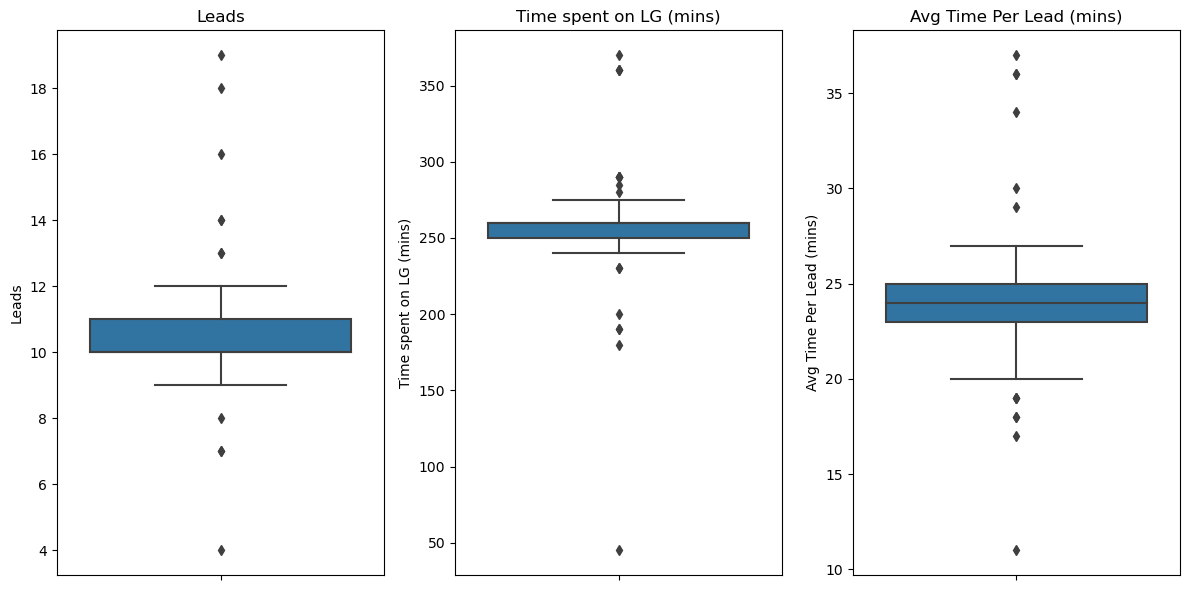

In [364]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns with high outlier percentages
high_outlier_cols = ["Leads", "Time spent on LG (mins)", "Avg Time Per Lead (mins)"]

# Boxplots for visualization
plt.figure(figsize=(12, 6))
for i, col in enumerate(high_outlier_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [365]:
for col in ["Leads", "Time spent on LG (mins)", "Avg Time Per Lead (mins)"]:
    print(f"{col} -> Before: Min={df[col].min()}, Max={df[col].max()}")
    df[col + "_winsorized"] = winsorize(df[col], limits=[0.05, 0.05])
    print(f"{col} -> After: Min={df[col + '_winsorized'].min()}, Max={df[col + '_winsorized'].max()}\n")


Leads -> Before: Min=4.0, Max=19.0
Leads -> After: Min=8.0, Max=14.0

Time spent on LG (mins) -> Before: Min=45.0, Max=370.0
Time spent on LG (mins) -> After: Min=190.0, Max=360.0

Avg Time Per Lead (mins) -> Before: Min=11.0, Max=37.0
Avg Time Per Lead (mins) -> After: Min=18.0, Max=34.0



In [366]:
from scipy.stats.mstats import winsorize

for col in ["Leads", "Time spent on LG (mins)", "Avg Time Per Lead (mins)"]:
    df[col + "_winsorized"] = winsorize(df[col], limits=[0.02, 0.02])  # 2% trimming

# Check new min & max
for col in ["Leads", "Time spent on LG (mins)", "Avg Time Per Lead (mins)"]:
    print(f"{col} -> After 2% Winsorization: Min={df[col + '_winsorized'].min()}, Max={df[col + '_winsorized'].max()}")


Leads -> After 2% Winsorization: Min=7.0, Max=18.0
Time spent on LG (mins) -> After 2% Winsorization: Min=180.0, Max=360.0
Avg Time Per Lead (mins) -> After 2% Winsorization: Min=17.0, Max=36.0


In [367]:
from scipy.stats.mstats import winsorize

# Apply 2% to Leads & Avg Time Per Lead
for col in ["Leads", "Avg Time Per Lead (mins)"]:
    df[col + "_winsorized"] = winsorize(df[col], limits=[0.02, 0.02])  

# Apply 1.5% to Time Spent on LG
df["Time spent on LG (mins)_winsorized"] = winsorize(df["Time spent on LG (mins)"], limits=[0.015, 0.015])

# Check new min & max values
for col in ["Leads", "Time spent on LG (mins)", "Avg Time Per Lead (mins)"]:
    print(f"{col} -> After Winsorization: Min={df[col + '_winsorized'].min()}, Max={df[col + '_winsorized'].max()}")


Leads -> After Winsorization: Min=7.0, Max=18.0
Time spent on LG (mins) -> After Winsorization: Min=45.0, Max=370.0
Avg Time Per Lead (mins) -> After Winsorization: Min=17.0, Max=36.0


In [368]:
df.head()

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads,Leads_winsorized,Time spent on LG (mins)_winsorized,Avg Time Per Lead (mins)_winsorized
0,Mon,12-06-2023,7.0,240.0,34.0,Attended,0.0,7.0,240.0,34.0
1,Tue,13-06-2023,10.0,360.0,36.0,Attended,3.0,10.0,360.0,36.0
2,Wed,14-06-2023,10.0,270.0,27.0,Attended,0.0,10.0,270.0,27.0
3,Thu,15-06-2023,10.0,260.0,26.0,Attended,0.0,10.0,260.0,26.0
4,Fri,16-06-2023,10.0,240.0,24.0,Attended,0.0,10.0,240.0,24.0


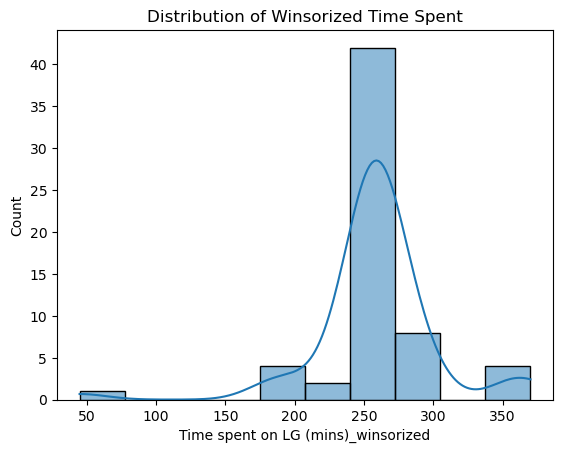

In [369]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Time spent on LG (mins)_winsorized"], bins=10, kde=True)
plt.title("Distribution of Winsorized Time Spent")
plt.show()


In [370]:
from scipy.stats.mstats import winsorize
df["Time_spent_winsorized"] = winsorize(df["Time spent on LG (mins)"], limits=[0.03, 0.03])  # 3% winsorization


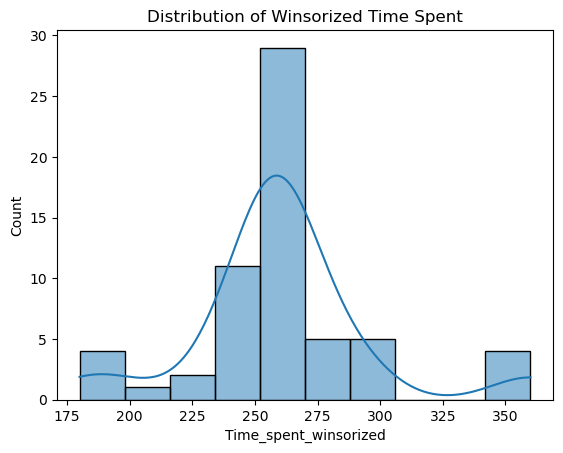

In [371]:
sns.histplot(df["Time_spent_winsorized"], bins=10, kde=True)
plt.title("Distribution of Winsorized Time Spent")
plt.show()


In [372]:
df.head()

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads,Leads_winsorized,Time spent on LG (mins)_winsorized,Avg Time Per Lead (mins)_winsorized,Time_spent_winsorized
0,Mon,12-06-2023,7.0,240.0,34.0,Attended,0.0,7.0,240.0,34.0,240.0
1,Tue,13-06-2023,10.0,360.0,36.0,Attended,3.0,10.0,360.0,36.0,360.0
2,Wed,14-06-2023,10.0,270.0,27.0,Attended,0.0,10.0,270.0,27.0,270.0
3,Thu,15-06-2023,10.0,260.0,26.0,Attended,0.0,10.0,260.0,26.0,260.0
4,Fri,16-06-2023,10.0,240.0,24.0,Attended,0.0,10.0,240.0,24.0,240.0


In [373]:
df = df.drop(columns=["Time spent on LG (mins)_winsorized"])


In [374]:
df

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads,Leads_winsorized,Avg Time Per Lead (mins)_winsorized,Time_spent_winsorized
0,Mon,12-06-2023,7.0,240.0,34.0,Attended,0.0,7.0,34.0,240.0
1,Tue,13-06-2023,10.0,360.0,36.0,Attended,3.0,10.0,36.0,360.0
2,Wed,14-06-2023,10.0,270.0,27.0,Attended,0.0,10.0,27.0,270.0
3,Thu,15-06-2023,10.0,260.0,26.0,Attended,0.0,10.0,26.0,260.0
4,Fri,16-06-2023,10.0,240.0,24.0,Attended,0.0,10.0,24.0,240.0
...,...,...,...,...,...,...,...,...,...,...
56,Mon,07-08-2023,11.0,250.0,23.0,Attended,0.0,11.0,23.0,250.0
57,Tue,08-08-2023,10.0,190.0,19.0,Attended,0.0,10.0,19.0,190.0
58,Wed,09-08-2023,10.0,190.0,19.0,Attended,0.0,10.0,19.0,190.0
59,Thu,10-08-2023,10.0,180.0,18.0,Missed,0.0,10.0,18.0,180.0


In [375]:
df.to_csv("FINAL RAJ.csv", index=False)


In [376]:
df = pd.read_csv("FINAL RAJ.csv")  # Change filename accordingly


In [377]:
df.head(10)

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads,Leads_winsorized,Avg Time Per Lead (mins)_winsorized,Time_spent_winsorized
0,Mon,12-06-2023,7.0,240.0,34.0,Attended,0.0,7.0,34.0,240.0
1,Tue,13-06-2023,10.0,360.0,36.0,Attended,3.0,10.0,36.0,360.0
2,Wed,14-06-2023,10.0,270.0,27.0,Attended,0.0,10.0,27.0,270.0
3,Thu,15-06-2023,10.0,260.0,26.0,Attended,0.0,10.0,26.0,260.0
4,Fri,16-06-2023,10.0,240.0,24.0,Attended,0.0,10.0,24.0,240.0
5,Sat,17-06-2023,10.0,260.0,24.0,Attended,0.0,10.0,24.0,260.0
6,Sun,18-06-2023,10.0,260.0,24.0,Attended,0.0,10.0,24.0,260.0
7,Mon,19-06-2023,10.0,360.0,36.0,Attended,0.0,10.0,36.0,360.0
8,Tue,20-06-2023,10.0,260.0,26.0,Attended,0.0,10.0,26.0,260.0
9,Wed,21-06-2023,8.0,240.0,30.0,Attended,2.0,8.0,30.0,240.0


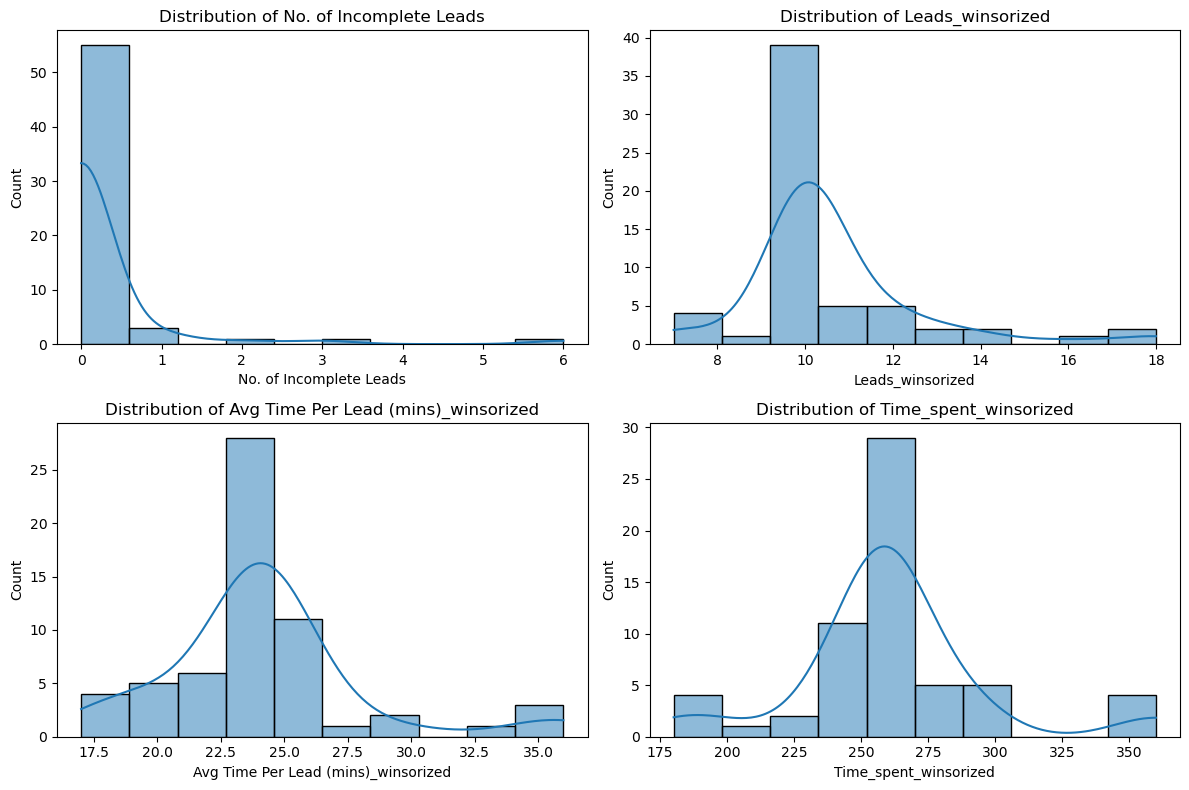

In [378]:
columns = ["No. of Incomplete Leads", "Leads_winsorized", 
           "Avg Time Per Lead (mins)_winsorized", "Time_spent_winsorized"]
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=10)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

Before Winsorization:
count    61.000000
mean      0.229508
std       0.901729
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       6.000000
Name: No. of Incomplete Leads, dtype: float64

After Winsorization:
count    61.000000
mean      0.098361
std       0.300273
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000
Name: No. of Incomplete Leads (Winsorized), dtype: float64


C:\Users\VAISHANAVI\anaconda3\Lib\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


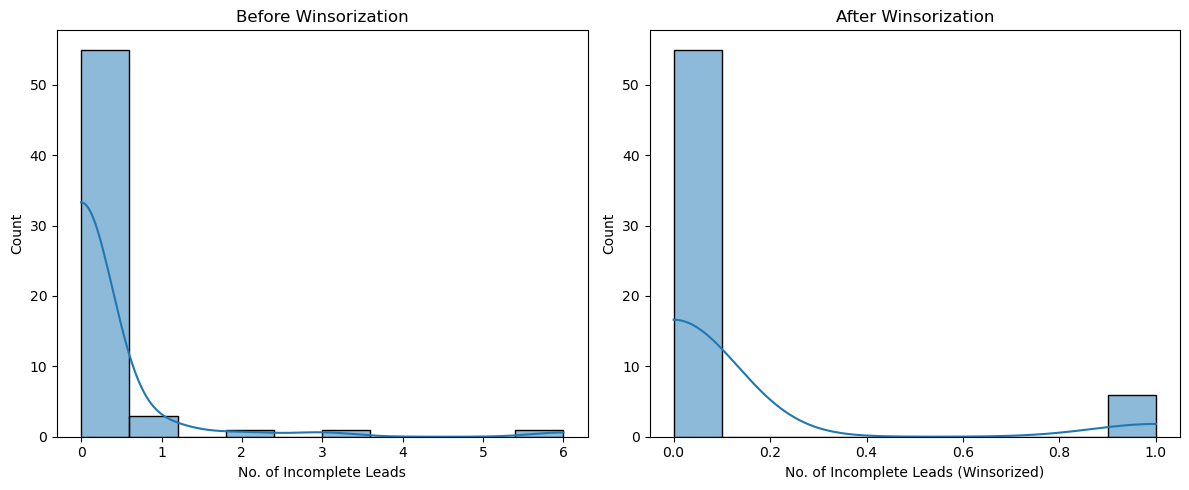

In [379]:
from scipy.stats.mstats import winsorize

# Winsorize "No. of Incomplete Leads" (trim 5% from both ends)
df["No. of Incomplete Leads (Winsorized)"] = winsorize(df["No. of Incomplete Leads"], limits=[0.05, 0.05])

# Print summary before and after
print("Before Winsorization:")
print(df["No. of Incomplete Leads"].describe())

print("\nAfter Winsorization:")
print(df["No. of Incomplete Leads (Winsorized)"].describe())

# Histogram to visualize change
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df["No. of Incomplete Leads"], kde=True, bins=10)
plt.title("Before Winsorization")

plt.subplot(1, 2, 2)
sns.histplot(df["No. of Incomplete Leads (Winsorized)"], kde=True, bins=10)
plt.title("After Winsorization")

plt.tight_layout()
plt.show()


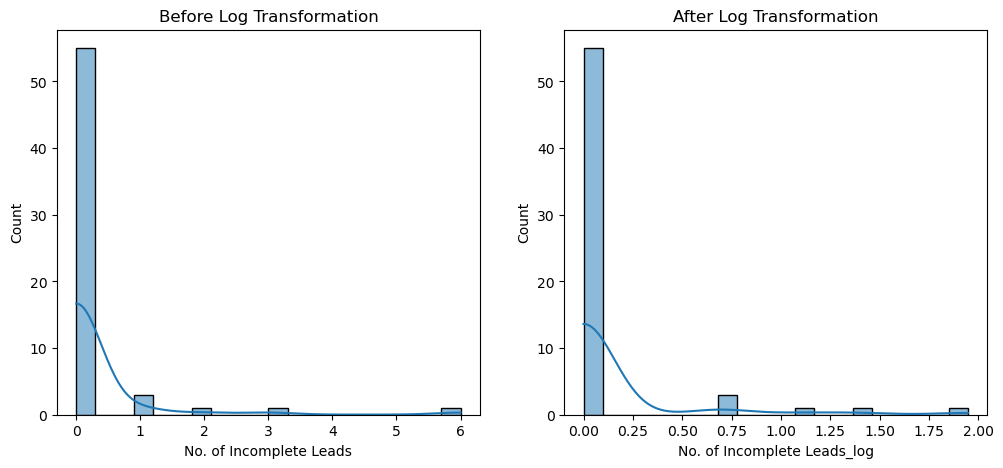

In [380]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log transformation
df["No. of Incomplete Leads_log"] = np.log1p(df["No. of Incomplete Leads"])

# Compare Before vs. After
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before transformation
sns.histplot(df["No. of Incomplete Leads"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Before Log Transformation")

# After transformation
sns.histplot(df["No. of Incomplete Leads_log"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("After Log Transformation")

plt.show()


In [381]:
df

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads,Leads_winsorized,Avg Time Per Lead (mins)_winsorized,Time_spent_winsorized,No. of Incomplete Leads (Winsorized),No. of Incomplete Leads_log
0,Mon,12-06-2023,7.0,240.0,34.0,Attended,0.0,7.0,34.0,240.0,0.0,0.000000
1,Tue,13-06-2023,10.0,360.0,36.0,Attended,3.0,10.0,36.0,360.0,1.0,1.386294
2,Wed,14-06-2023,10.0,270.0,27.0,Attended,0.0,10.0,27.0,270.0,0.0,0.000000
3,Thu,15-06-2023,10.0,260.0,26.0,Attended,0.0,10.0,26.0,260.0,0.0,0.000000
4,Fri,16-06-2023,10.0,240.0,24.0,Attended,0.0,10.0,24.0,240.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
56,Mon,07-08-2023,11.0,250.0,23.0,Attended,0.0,11.0,23.0,250.0,0.0,0.000000
57,Tue,08-08-2023,10.0,190.0,19.0,Attended,0.0,10.0,19.0,190.0,0.0,0.000000
58,Wed,09-08-2023,10.0,190.0,19.0,Attended,0.0,10.0,19.0,190.0,0.0,0.000000
59,Thu,10-08-2023,10.0,180.0,18.0,Missed,0.0,10.0,18.0,180.0,0.0,0.000000


In [382]:
columns_to_remove = ["Leads", "Time spent on LG (mins)", "Avg Time Per Lead (mins)", "No. of Incomplete Leads_log", "No. of Incomplete Leads (Winsorized)"]  # Replace with actual column names
df = df.drop(columns=columns_to_remove)
df

,Day,Date,Daily Team Review,No. of Incomplete Leads,Leads_winsorized,Avg Time Per Lead (mins)_winsorized,Time_spent_winsorized
0,Mon,12-06-2023,Attended,0.0,7.0,34.0,240.0
1,Tue,13-06-2023,Attended,3.0,10.0,36.0,360.0
2,Wed,14-06-2023,Attended,0.0,10.0,27.0,270.0
3,Thu,15-06-2023,Attended,0.0,10.0,26.0,260.0
4,Fri,16-06-2023,Attended,0.0,10.0,24.0,240.0
...,...,...,...,...,...,...,...
56,Mon,07-08-2023,Attended,0.0,11.0,23.0,250.0
57,Tue,08-08-2023,Attended,0.0,10.0,19.0,190.0
58,Wed,09-08-2023,Attended,0.0,10.0,19.0,190.0
59,Thu,10-08-2023,Missed,0.0,10.0,18.0,180.0


In [394]:
df = pd.read_csv("FINAL RAJ.csv")
df

,Day,Date,Daily Team Review,No. of Incomplete Leads,Leads_winsorized,Avg Time Per Lead (mins)_winsorized,Time_spent_winsorized
0,Mon,12-06-2023,Attended,0,7,34,240
1,Tue,13-06-2023,Attended,3,10,36,360
2,Wed,14-06-2023,Attended,0,10,27,270
3,Thu,15-06-2023,Attended,0,10,26,260
4,Fri,16-06-2023,Attended,0,10,24,240
...,...,...,...,...,...,...,...
56,Mon,07-08-2023,Attended,0,11,23,250
57,Tue,08-08-2023,Attended,0,10,19,190
58,Wed,09-08-2023,Attended,0,10,19,190
59,Thu,10-08-2023,Missed,0,10,18,180


In [396]:
leads_winsorized_std = df["Leads_winsorized"].std()
print("Standard Deviation of Leads_winsorized:", leads_winsorized_std)


Standard Deviation of Leads_winsorized: 2.025115526624313
